In [241]:
import pandas as pd
import numpy as np

# TO-DO

- añadir índice de europa y mex
- calcular bien el risk free return (que no sea 0)


- ver si hay de 3 meses diarios
- ver si hay de antes de 2012 del s&p 500

- ver si se puede modificar la forma de la graf. Que sea menos alta


In [463]:
bc = pd.read_csv('../../datasets/OtherAssetsCSV/bitcoin.csv') #from 2015, many sources only have from 2014 to present day
sp_500 = pd.read_csv('../../datasets/OtherAssetsCSV/SP500(1).csv') #oct 2012 to 2021
au = pd.read_csv('../../datasets/OtherAssetsCSV/gold.csv')# from 2004 to present day
tb_1y = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds1.csv') # 1962 to present
tb_10y = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds10.csv') # 1962 to present
tb_30y = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds30.csv') # 1962 to present
ipc = pd.read_csv('../../datasets/OtherAssetsCSV/ipc_mxx.csv')
euro = pd.read_csv('../../datasets/OtherAssetsCSV/euro_stoxx50.csv')
tb_3m = pd.read_csv('../../datasets/OtherAssetsCSV/Bonds_3_months.csv') # 1934 to present

In [464]:

#EJEMPLO por si alguien quiere quedarse sin

#sp_500['date'] = pd.to_datetime(sp_500['DATE'])
#sp_500['date'].dt.month
#sp_500['year'] = sp_500['date'].dt.year

#start_date = '2012-10-16'
#end_date = '2017-10-16'

#test = sp_500[(sp_500['date'] > start_date) & (sp_500['date'] <= end_date) == True]
#tb_3m[tb_3m['DATE'] == '2015-10-22']
#tb_3m = tb_3m[tb_3m['DTB3'] != '.']

In [465]:
#tb_3m['returns'] = tb_3m['DTB3'].str.replace('\.','')#.astype(float)   #.astype(float)
#tb_3m['int_'] = tb_3m['DTB3'].str.extract('(-?[0-9][0-9]?)\.').astype(float)
#tb_3m['dec'] = tb_3m['DTB3'].str.extract('\.([0-9]?[0-9]?[0-9]?)')#.astype(float)
#tb_3m['dec'] = tb_3m['dec'].replace('0$', '', regex=True)
#tb_3m['dec'] = tb_3m['dec'].replace('^\s*$', np.NaN, regex=True).astype(float)/100
#tb_3m['returns'] = tb_3m['int_']+tb_3m['dec']
#tb_3m['returns'] = tb_3m['returns']

#tb_3m['test'] = tb_3m['DTB3'].replace('', '-', regex=True).astype(float)
#tb_3m['returns'] = tb_3m['test'].str.replace('\.','')#.astype(float)

#tb_3m  #[tb_3m['returns'] != ''].sort_values(by='returns')

In [466]:
tb_3m['past_close'] = tb_3m[' Close'].shift(1)
tb_3m['returns'] = (tb_3m[' Close']-tb_3m['past_close'])/tb_3m['past_close']

In [467]:
euro['past_close'] = euro[' Close'].shift(1)
euro['return'] = (euro[' Close']-euro['past_close'])/euro['past_close']
#euro.plot.scatter(x='Date', y=' Close')


In [468]:
ipc['past_close'] = ipc['Close'].shift(1)
ipc['return'] = (ipc['Close']-ipc['past_close'])/ipc['past_close']
#ipc.plot.scatter(x='Date', y='Close')

In [469]:
tb_1y['returns'] = tb_1y['returns']/100
tb_3m['returns'] = tb_3m['returns']/100
tb_10y['returns'] = tb_10y['returns']/100
tb_30y['returns'] = tb_30y['returns']/100


In [470]:
sp_500['date'] = pd.to_datetime(sp_500['DATE'])
sp_500 = sp_500.rename({'daily_return': 'sp_500'}, axis=1)[['date', 'sp_500']]

bc['date'] = pd.to_datetime(bc['time'])
bc = bc.rename({'daily_return': 'bc'}, axis=1)[['date', 'bc']]

au['date'] = pd.to_datetime(au['Date'])
au = au.rename({'daily_return': 'au'}, axis=1)[['date', 'au']]

tb_1y['date'] = pd.to_datetime(tb_1y['date'])
tb_1y = tb_1y.rename({'returns': 'tb_1y'}, axis=1)[['date', 'tb_1y']]

tb_10y['date'] = pd.to_datetime(tb_10y['date'])
tb_10y = tb_10y.rename({'returns': 'tb_10y'}, axis=1)[['date', 'tb_10y']]

tb_30y['date'] = pd.to_datetime(tb_30y['date'])
tb_30y = tb_30y.rename({'returns': 'tb_30y'}, axis=1)[['date', 'tb_30y']]

tb_3m['date'] = pd.to_datetime(tb_3m['Date'])
tb_3m = tb_3m.rename({'returns': 'tb_3m'}, axis=1)[['date', 'tb_3m']]

euro['date'] = pd.to_datetime(euro['Date'])
euro = euro.rename({'return': 'euro'}, axis=1)[['date', 'euro']]

ipc['date'] = pd.to_datetime(ipc['Date'])
ipc = ipc.rename({'return': 'ipc'}, axis=1)[['date', 'ipc']]

C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '15/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '16/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '17/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '18/01/1962' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users

C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '27/07/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '30/07/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '31/07/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '13/08/1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users

C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '22/08/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '23/08/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '24/08/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users\ernie\AppData\Local\Temp\ipykernel_5560\3692479358.py:10: UserWarning: Parsing '25/08/2006' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  tb_1y['date'] = pd.to_datetime(tb_1y['date'])
C:\Users

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## cambiar fechas y unificar dfs

## Unir tablas

In [471]:
#result = pd.concat([sp_500, bc], axis=1, join="inner")
result = sp_500.merge(bc, how='inner', on='date')
result = result.merge(au, how='inner', on='date')
result = result.merge(tb_1y, how='inner', on='date')
result = result.merge(tb_3m, how='inner', on='date')
result = result.merge(tb_10y, how='inner', on='date')
result = result.merge(tb_30y, how='inner', on='date')
result = result.merge(euro, how='inner', on='date')
result = result.merge(ipc, how='inner', on='date')


result['tb_3m'] = result['tb_3m'].fillna(0)

result.iloc[62]   #['tb_3m'].sort_values() #.head(5)

date      2015-10-26 00:00:00
sp_500              -0.001913
bc                   0.007474
au                  -0.000628
tb_1y                0.000417
tb_3m                  0.0015
tb_10y              -0.000096
tb_30y              -0.000103
euro                 0.009935
ipc                  0.000584
Name: 62, dtype: object

In [9]:
#sp_500.groupby(by='year').count()

# Intento de hacer los plots de los assets

In [10]:
#test_var = (test.var()['daily_return']*243)**0.5
#test_mean = test.mean()['daily_return']*243*100

In [500]:
values = result[['sp_500', 'bc', 'au', 'tb_1y', 'tb_3m', 'tb_10y', 'tb_30y', 'euro', 'ipc']]

ret_vars = (values.var()*243)**0.5

ret_means = values.mean()*243*100

returns_df = pd.DataFrame()

returns_df['returns'] = ret_means
returns_df['volatility'] = ret_vars

returns_df.shape[0]

9

In [516]:
values#.head()

sp_500        bc        au     tb_1y     tb_3m    tb_10y    tb_30y  \
0     0.000771       NaN -0.027151  0.000690  0.000909  0.000171  0.000065   
1    -0.004262 -0.009571 -0.003122  0.000968 -0.000833 -0.000126 -0.000065   
2    -0.002388  0.002055 -0.005410  0.000000  0.000000 -0.000085 -0.000130   
3    -0.005676 -0.001799 -0.004485 -0.000294 -0.001220 -0.000215 -0.000197   
4    -0.010703  0.042287  0.009777 -0.000303 -0.001087 -0.000044 -0.000067   
...        ...       ...       ...       ...       ...       ...       ...   
1337  0.006224  0.045950  0.002254  0.001071  0.001268  0.000274  0.000269   
1338 -0.001010 -0.062595 -0.004310  0.001818  0.001667  0.000068  0.000106   
1339  0.001402 -0.022545 -0.000297 -0.000256  0.000667  0.000403  0.000316   
1340 -0.002990  0.014005  0.007177  0.000000 -0.001000 -0.000194 -0.000153   
1341 -0.002626 -0.019329  0.006832  0.000263 -0.002647  0.000000 -0.000155   

          euro       ipc  
0     0.010587  0.005353  
1     0.003405 -0.003660  
2     0.000259 -0.016097  
3     0.009622  0.003714  
4     0.024736 -0.013088  
...        ...       ...  
1337  0.002550  0.004730  
1338  0.006325 -0.000396  
1339 -0.004933 -0.009195  
1340  0.001782  0.008082  
1341 -0.007713  0.001828  

[1342 rows x 9 columns]

In [502]:
returns_df

returns  volatility
sp_500  12.596714    0.176696
bc      76.490811    0.672722
au       6.034367    0.133865
tb_1y    0.421727    0.009814
tb_3m   -0.430039    0.117325
tb_10y  -0.041471    0.004916
tb_30y  -0.072917    0.003471
euro    -0.795458    0.199780
ipc      5.355567    0.157597

In [503]:
ret_means

sp_500    12.596714
bc        76.490811
au         6.034367
tb_1y      0.421727
tb_3m     -0.430039
tb_10y    -0.041471
tb_30y    -0.072917
euro      -0.795458
ipc        5.355567
dtype: float64

In [504]:
df = returns_df.reset_index()

df.shape[0]

9

In [505]:
# CURVA CON LOS 4 ASSETS

import numpy as np

num_portfolios = 10000
num_assets = returns_df.shape[0]

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

ind_er = ret_means
cov_matrix = values.cov()

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [506]:
data = {'Returns':p_ret, 'Volatility':p_vol}


for counter, symbol in enumerate(df['index'].unique()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]


portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created
#data['Returns']
portfolios.sort_values(by=['Returns'], ascending = False)

Returns  Volatility  sp_500 weight  bc weight  au weight  \
5159  34.053435    0.299309       0.028683   0.434442   0.063230   
6856  30.284502    0.255315       0.124578   0.353739   0.115625   
4047  28.602172    0.236150       0.178987   0.328611   0.192616   
811   27.171399    0.223220       0.285154   0.296607   0.029628   
2364  26.816702    0.231428       0.040566   0.320781   0.012095   
...         ...         ...            ...        ...        ...   
6665   1.443671    0.056684       0.034864   0.002327   0.033346   
3706   1.408825    0.058613       0.028273   0.012252   0.012616   
6159   1.273382    0.050485       0.020973   0.006426   0.038573   
1297   1.048048    0.049666       0.015015   0.004200   0.028169   
6497   1.026572    0.050900       0.038385   0.005756   0.035387   

      tb_1y weight  tb_3m weight  tb_10y weight  tb_30y weight  euro weight  \
5159      0.024837      0.115392       0.237523       0.042175     0.025334   
6856      0.000229      0.022255       0.040695       0.021173     0.122015   
4047      0.086457      0.041598       0.018392       0.108437     0.032657   
811       0.099434      0.004293       0.067014       0.001952     0.078138   
2364      0.128515      0.019260       0.059427       0.071741     0.033166   
...            ...           ...            ...            ...          ...   
6665      0.096381      0.141912       0.190501       0.104942     0.237059   
3706      0.241119      0.019155       0.067425       0.297957     0.284461   
6159      0.249464      0.060694       0.295466       0.014383     0.237792   
1297      0.214961      0.057924       0.206206       0.146632     0.232410   
6497      0.236455      0.188493       0.088463       0.173737     0.221539   

      ipc weight  
5159    0.028384  
6856    0.199690  
4047    0.012246  
811     0.137780  
2364    0.314449  
...          ...  
6665    0.158668  
3706    0.036742  
6159    0.076229  
1297    0.094483  
6497    0.011784  

[10000 rows x 11 columns]

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

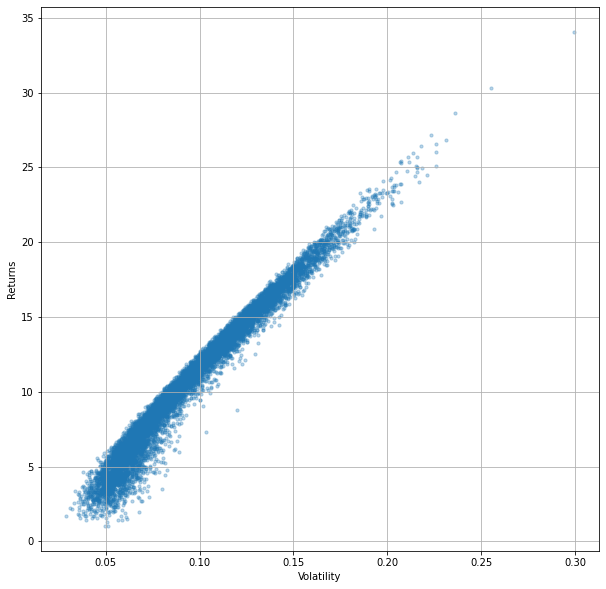

In [507]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

# Experimento usando S&P 500 y bonos de 1 año
- Bitcoin cambia mucho "la forma" de la curva. 

In [508]:
returns_df

returns  volatility
sp_500  12.596714    0.176696
bc      76.490811    0.672722
au       6.034367    0.133865
tb_1y    0.421727    0.009814
tb_3m   -0.430039    0.117325
tb_10y  -0.041471    0.004916
tb_30y  -0.072917    0.003471
euro    -0.795458    0.199780
ipc      5.355567    0.157597

In [510]:
# CURVA CON bonos y s&p 500

import numpy as np

num_portfolios = 10000
num_assets = returns_df.shape[0]-1

p_ret = [] # Defne an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights


ind_er = [12.596714,6.034367,0.421727,-0.430039,-0.041471, -0.072917, -0.795458, 5.355567 ]
cov_matrix = values[['sp_500', 'au','tb_1y', 'tb_3m', 'tb_10y', 'tb_30y', 'euro', 'ipc']].cov()

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [511]:
df_2 = df.head(1)
df_2 = pd.concat([df.head(1), df.tail(5)])
df_2#.head(1)

index    returns  volatility
0  sp_500  12.596714    0.176696
4   tb_3m  -0.430039    0.117325
5  tb_10y  -0.041471    0.004916
6  tb_30y  -0.072917    0.003471
7    euro  -0.795458    0.199780
8     ipc   5.355567    0.157597

In [512]:
data = {'Returns':p_ret, 'Volatility':p_vol}


for counter, symbol in enumerate(df_2['index'].unique()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]


portfolios  = pd.DataFrame(data)
portfolios.sort_values(by='Returns', ascending=False).head() # Dataframe of the 10000 portfolios created
#data['Returns']

Returns  Volatility  sp_500 weight  tb_3m weight  tb_10y weight  \
6465  6.492187    0.087081       0.377835      0.159811       0.048283   
6682  6.465540    0.089481       0.308394      0.203476       0.004301   
3146  6.455207    0.078605       0.323615      0.352409       0.139731   
9156  6.416759    0.082748       0.268111      0.331600       0.129031   
492   6.331222    0.095844       0.330246      0.080372       0.154614   

      tb_30y weight  euro weight  ipc weight  
6465       0.003643     0.105969    0.052674  
6682       0.060947     0.086985    0.051807  
3146       0.047757     0.043350    0.029770  
9156       0.027155     0.003150    0.014085  
492        0.017679     0.007779    0.089235

Returns son tan bajos por tener 

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

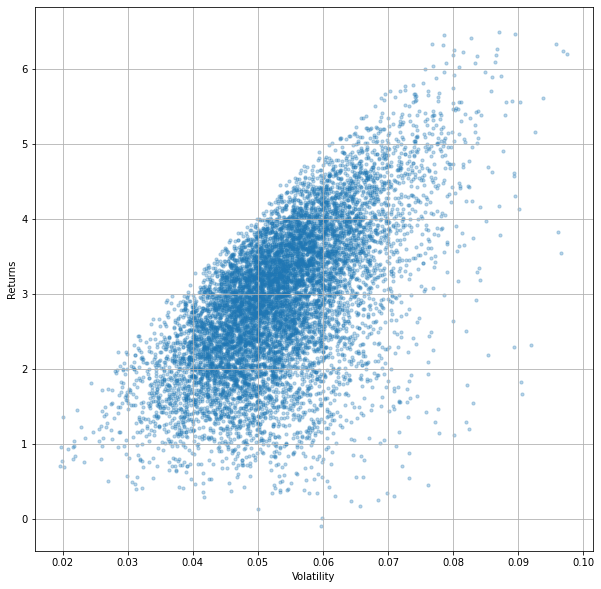

In [513]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])



# Sharpe Ratio

Las escalas parecen estar bien

In [514]:
returns_df.loc['tb_3m']['returns']

-0.4300391959445221

In [515]:
returns_df
#short term bonds: 4.28 .
#promedio 2015 a 2021
risk_free_ret = returns_df.loc['tb_3m']['returns']/100

returns_df['sharpe'] = (returns_df['returns']/100 - risk_free_ret)/returns_df['volatility']

returns_df

returns  volatility    sharpe
sp_500  12.596714    0.176696  0.737242
bc      76.490811    0.672722  1.143427
au       6.034367    0.133865  0.482904
tb_1y    0.421727    0.009814  0.867917
tb_3m   -0.430039    0.117325  0.000000
tb_10y  -0.041471    0.004916  0.790415
tb_30y  -0.072917    0.003471  1.028826
euro    -0.795458    0.199780 -0.018291
ipc      5.355567    0.157597  0.367115

<AxesSubplot:xlabel='volatility', ylabel='returns'>

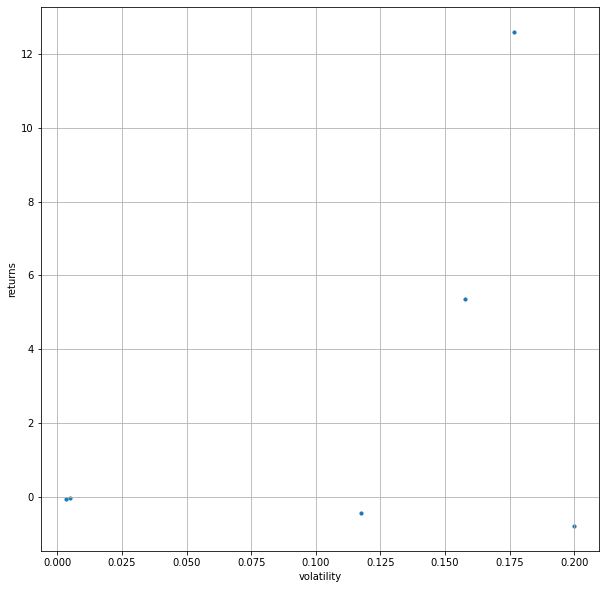

In [519]:
df_2.plot.scatter(x='volatility', y='returns', marker='o', s=10, grid=True, figsize=[10,10])
